In [1]:
#importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the amazon sales data
df = pd.read_csv('Amazon Sales data.csv')
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
#Size and shape of the data
print('Shape:', df.shape)
print('Size:', df.size)

Shape: (100, 14)
Size: 1400


In [4]:
#to understand the different data types present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 8.3+ KB


In [5]:
#we notice that 'Order Date' and 'Ship Date' are in 'object' type but we need it as 'datetime' type
#changing the 'Order Date' and 'Ship Date' to datetime:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info() #to confirm changes have been made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [6]:
#to understand the range of values present in dates - dates span 7 years.
(df['Order Date'].min(), df['Order Date'].max())

(Timestamp('2010-02-02 00:00:00'), Timestamp('2017-05-22 00:00:00'))

In [7]:
#to understand the values present in the data
df.describe()
#from this we can see that there are no improperly entered values or outliers. 

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
#to check whether there are any null values
df.isnull().sum()
#from this we can se that there are no empty values in any rows

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

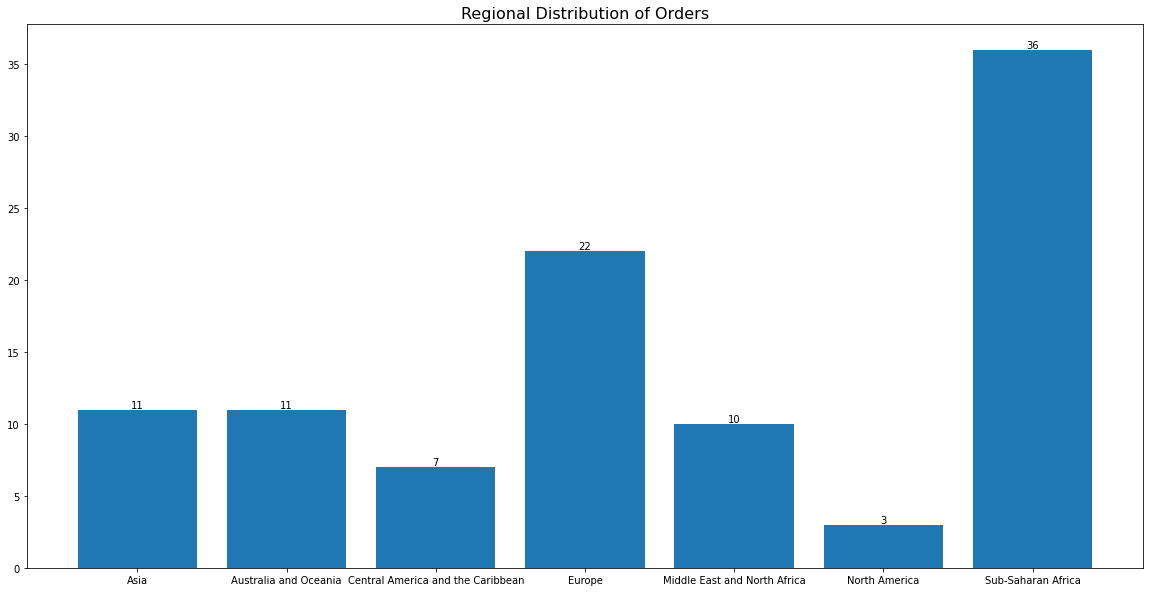

In [9]:
#To understand number of orders by region
orders_by_region = df.groupby('Region')['Order ID'].nunique()
orders_by_region = pd.DataFrame(orders_by_region)
orders_by_region = orders_by_region.rename(columns = {'Order ID' : 'Number of Orders'})
plt.figure(figsize = (20,10))
plt.title("Regional Distribution of Orders", fontsize = 16)
bar_plot = plt.bar(x = orders_by_region.index, height= orders_by_region['Number of Orders'])
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')
#From this we can understand that sub-saharan africa has placed the highest amount of orders.

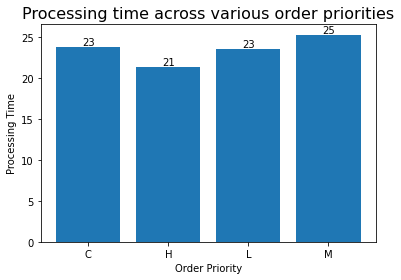

In [10]:
#to understand the time taken to process each order by priority and time to process:
df['time_to_process'] = (df['Ship Date'] - df['Order Date']).dt.days
processing_by_priority = df.groupby('Order Priority').agg({'time_to_process': 'mean'}).reset_index()
plt.title("Processing time across various order priorities", fontsize = 16)
plt.xlabel('Order Priority')
plt.ylabel('Processing Time')
bar_plot = plt.bar(x = processing_by_priority['Order Priority'], height= processing_by_priority['time_to_process'])
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')

#from this we can see that even though the priority changes, the processing time stays more or less the same.

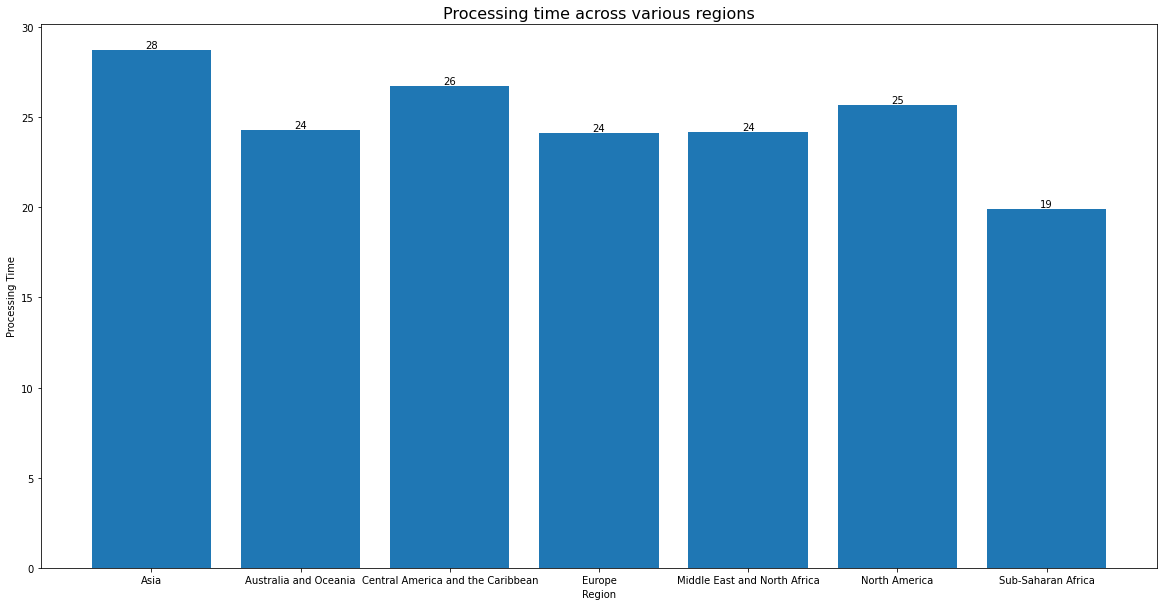

In [11]:
#let us investigate this further by grouping processing time and region
processing_by_region = df.groupby('Region').agg({'time_to_process': 'mean'}).reset_index()
plt.figure(figsize = (20,10))
plt.title("Processing time across various regions", fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Processing Time')
bar_plot = plt.bar(x = processing_by_region['Region'], height= processing_by_region['time_to_process'])
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')

#From this we can see that Asia has the highest processing time, whereas Sub-Saharan Africa has the lowest processing time.

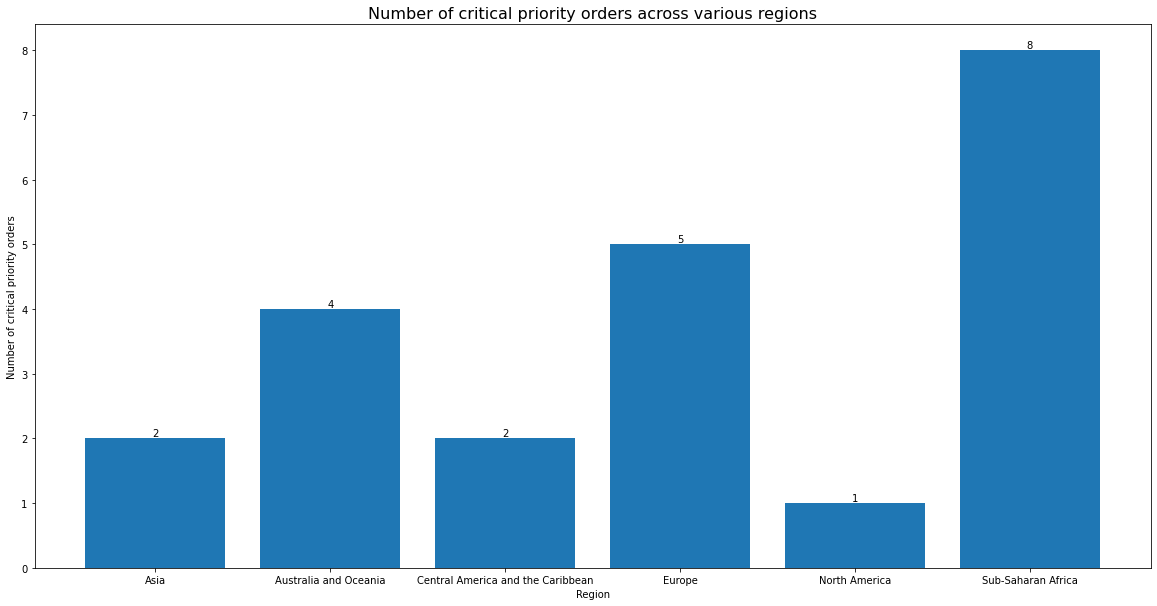

In [12]:
#Let us further investigate this by critical priority chosen by the various regions
critical_priority = df[df['Order Priority']=='C']
region_by_critical_priority = critical_priority.groupby('Region').size()
plt.figure(figsize = (20,10))
plt.title("Number of critical priority orders across various regions", fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Number of critical priority orders')
bar_plot = plt.bar(x = region_by_critical_priority.index, height= region_by_critical_priority.values)
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')


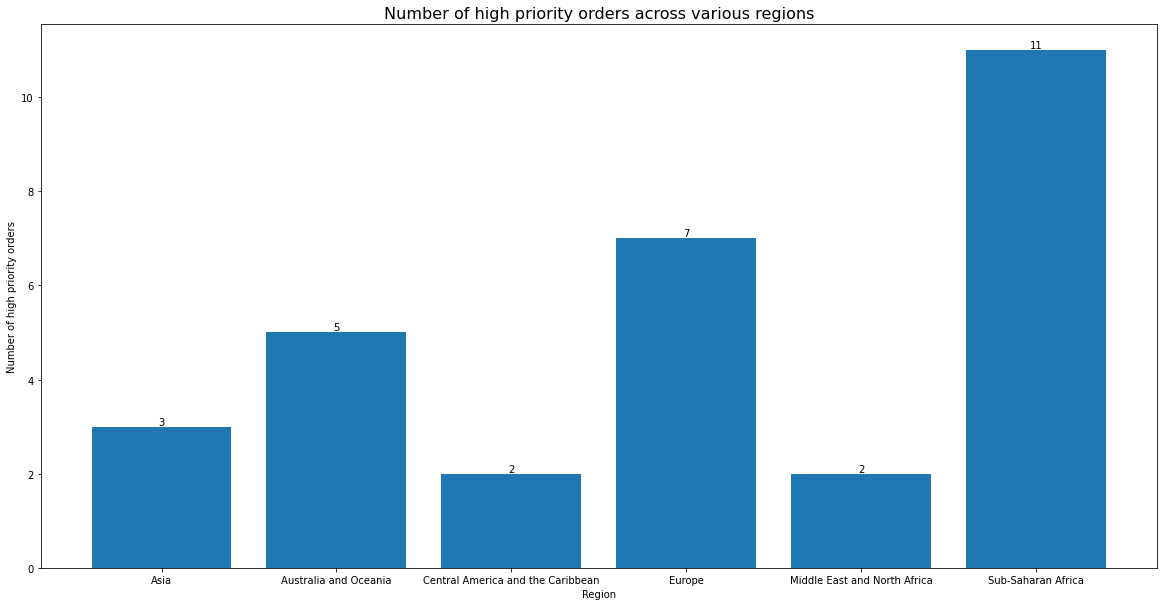

In [13]:
#Repeating the same thing as above, but for high priority orders:
high_priority = df[df['Order Priority']=='H']
region_by_high_priority = high_priority.groupby('Region').size()
plt.figure(figsize = (20,10))
plt.title("Number of high priority orders across various regions", fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Number of high priority orders')
bar_plot = plt.bar(x = region_by_high_priority.index, height= region_by_high_priority.values)
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')

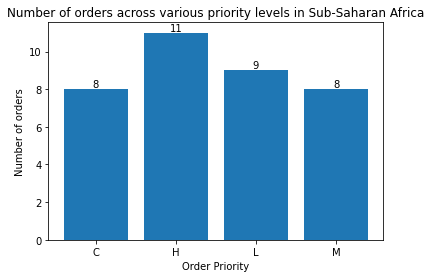

In [14]:
africa = df[df['Region'] == 'Sub-Saharan Africa']
africa_priority = africa.groupby('Order Priority').size()
plt.title("Number of orders across various priority levels in Sub-Saharan Africa")
plt.xlabel('Order Priority')
plt.ylabel('Number of orders')
bar_plot = plt.bar(x = africa_priority.index, height= africa_priority.values)
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height),
             ha='center', va='bottom')
#From the above analysis we can understand that Sub-Saharan Africa has the least amount of processing time
#because most of the orders placed from that region have order priority = C or H.

In [15]:
#This still doesnt answer why order priority of C has a high mean processing time
#Let us investigate this further by checking out critical_priority.
critical_priority['time_to_process'].describe()
#from this we can see that the maximum value is 50 days, for critical priority


count    22.000000
mean     23.863636
std      14.109421
min       0.000000
25%      15.500000
50%      26.000000
75%      32.750000
max      50.000000
Name: time_to_process, dtype: float64

In [16]:
#Let us check out where we have time to process is 50 days in critical priority
critical_priority[critical_priority['time_to_process'] == 50]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,time_to_process
72,Sub-Saharan Africa,Democratic Republic of the Congo,Beverages,Online,C,2011-05-26,585920464,2011-07-15,5741,47.45,31.79,272410.45,182506.39,89904.06,50


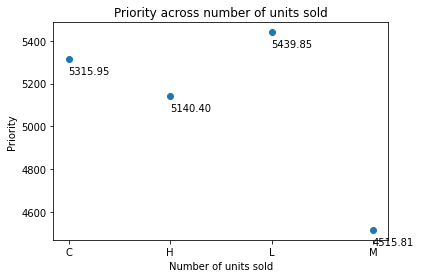

In [29]:
#Let us check out how the number of units varies over priority
units_priority = df.groupby('Order Priority')['Units Sold'].mean()
plt.xlabel('Number of units sold')
plt.ylabel('Priority')
plt.title('Priority across number of units sold')
plt.scatter(x = units_priority.index, y = units_priority.values)
for i, (index, value) in enumerate(units_priority.items()):
    rounded_value = round(value, 2)
    plt.annotate(f"{rounded_value:.2f}", (i, value), xytext=(0, -15), textcoords='offset points')
#We can see that mean number of units ordered is pretty high in C.

In [34]:
#Time to conduct hypothesis testing!
#Null Hypothesis: Processing time remains unaffected by number of units ordered in critcal priority
#Alternative hypothesis: Processing time is affected by number of units ordered in critical priority
from scipy import stats
significance_level = 0.05
stats.ttest_ind(a = critical_priority['time_to_process'], b = critical_priority['Units Sold'], equal_var = False)
#pvalue is less than significance level, so processing time is indeed affected by number of units ordered

Ttest_indResult(statistic=-8.931987624407942, pvalue=1.346533331861953e-08)

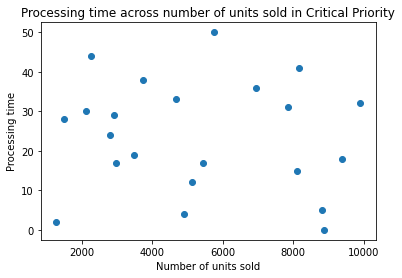

In [35]:
#Let us explore the critical_priority data frame further to understand how the processing time varies with number of units sold
units_time_c = [critical_priority['Units Sold'], critical_priority['time_to_process']]
units_time_c = pd.DataFrame(units_time_c)
units_time_c = units_time_c.T
plt.xlabel('Number of units sold')
plt.ylabel('Processing time')
plt.title('Processing time across number of units sold in Critical Priority')
plt.scatter(x = units_time_c['Units Sold'], y = units_time_c['time_to_process'])
#This still doesnt answer why it took 50 days to process the mid-size order

<BarContainer object of 22 artists>

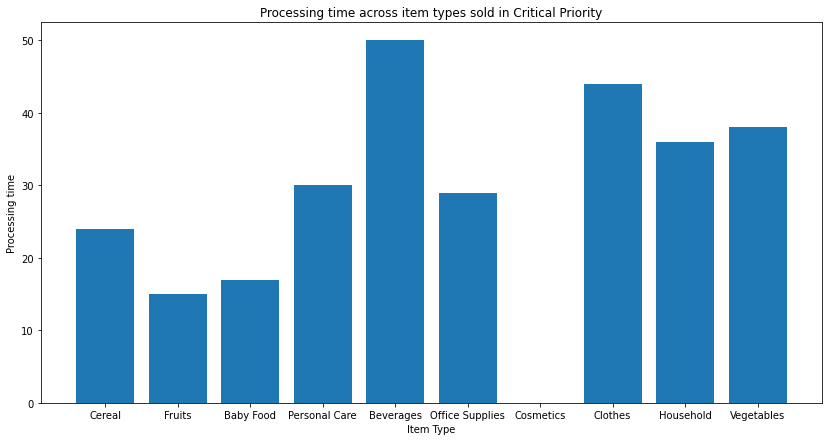

In [43]:
#Let us check out various categories of products and their processing times in critical priority mode
category_time_c = [critical_priority['Item Type'], critical_priority['time_to_process']]
category_time_c = pd.DataFrame(category_time_c)
category_time_c = category_time_c.T
plt.figure(figsize = (14, 7))
plt.xlabel('Item Type')
plt.ylabel('Processing time')
plt.title('Processing time across item types sold in Critical Priority')
plt.bar(x = category_time_c['Item Type'], height = category_time_c['time_to_process'])
#from this we can see that beverages has the highest processing time in critical priority

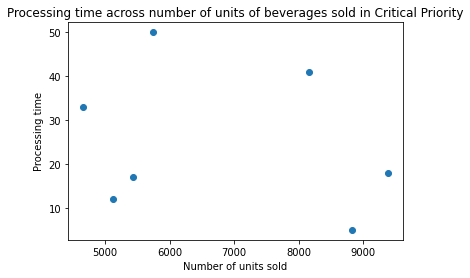

In [44]:
#Lets check out the processing time vs units plot for beverages in critical priority
beverages_c = critical_priority[critical_priority['Item Type'] == 'Beverages']
plt.xlabel('Number of units sold')
plt.ylabel('Processing time')
plt.title('Processing time across number of units of beverages sold in Critical Priority')
plt.scatter(x = beverages_c['Units Sold'], y = beverages_c['time_to_process'])
#This plot still doesnt answer why the 50 days processing time for that one order as discussed above.

In [50]:
beverages_c['time_to_process'].describe()

count     7.000000
mean     25.142857
std      16.466416
min       5.000000
25%      14.500000
50%      18.000000
75%      37.000000
max      50.000000
Name: time_to_process, dtype: float64

In [49]:
#Let us check if the 50 days data point is an outlier, by considering only the beverages dataset
z_scores = np.abs(stats.zscore(beverages_c['time_to_process']))
print(z_scores)
#72 is the datapoint we were looking at, and none of the data points have z-score above 3, so it is not an outlier

17    0.534135
28    0.862113
72    1.630518
76    0.468540
86    1.321282
89    0.515394
94    1.040158
Name: time_to_process, dtype: float64


In [54]:
#Let us check whether the ordering mode has any corelation for the processing time
#Converting sales channel to categorical to conduct stats test
def channel_mapper(channel):
    if channel.lower() in ['offline']:
        return 0
    else:
        return 1
beverages_c['SC Cat'] = beverages_c['Sales Channel'].apply(channel_mapper)


C:\Users\mithu\AppData\Local\Temp\ipykernel_1072\393090001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beverages_c['SC Cat'] = beverages_c['Sales Channel'].apply(channel_mapper)


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,time_to_process,SC Cat
17,Sub-Saharan Africa,Cameroon,Beverages,Offline,C,2015-04-01,519820964,2015-04-18,5430,47.45,31.79,257653.50,172619.70,85033.80,17,0
28,Europe,Norway,Beverages,Offline,C,2014-07-18,435608613,2014-07-30,5124,47.45,31.79,243133.80,162891.96,80241.84,12,0
72,Sub-Saharan Africa,Democratic Republic of the Congo,Beverages,Online,C,2011-05-26,585920464,2011-07-15,5741,47.45,31.79,272410.45,182506.39,89904.06,50,1
76,Australia and Oceania,Federated States of Micronesia,Beverages,Online,C,2014-10-28,217221009,2014-11-15,9379,47.45,31.79,445033.55,298158.41,146875.14,18,1
86,Sub-Saharan Africa,Sao Tome and Principe,Beverages,Offline,C,2011-01-16,180283772,2011-01-21,8829,47.45,31.79,418936.05,280673.91,138262.14,5,0


In [62]:
#Time to conduct a two sample test:
#Null Hypothesis: Processing time doesnt vary across the two samples
#Alternative Hypothesis: Processing time varies across the two samples
#Significance level = 0.05
t_statistic, p_value = stats.ttest_ind(beverages_c[beverages_c['SC Cat'] == 0]['time_to_process'],
                                       beverages_c[beverages_c['SC Cat'] == 1]['time_to_process'], equal_var = False)
print(p_value)
#p_value is greater than significance level: failed to reject the null hypothesis

0.5765892204508538


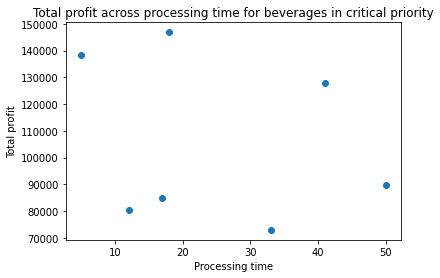

In [61]:
#Let us see how total profit varies with processing time
plt.xlabel('Processing time')
plt.ylabel('Total profit')
plt.title('Total profit across processing time for beverages in critical priority')
plt.scatter(x = beverages_c['time_to_process'], y = beverages_c['Total Profit'])


In [63]:
#Let us conduct hypothesis test to check whether processing time impacts total profit
#Null Hypothesis: Processing time does not impact total profit
#Alternative Hypothesis: Processing time does impact total profit
#Significance level = 0.05
stats.ttest_ind(a = beverages_c['time_to_process'], b = beverages_c['Total Profit'], equal_var = False)
#p value much lesser than significance level, so null hypothesis is rejected, Processing time does have an impact on total profit

Ttest_indResult(statistic=-9.136089646819773, pvalue=9.672383589930655e-05)

In [64]:
#This brings us to the conclusion that, the time_to_process = 50 data point is not an outlier.
#To find the actual reason for the time_to_process variable being so high, further investigation is required
#This data is not sufficient to answer our question. We need additional data to answer that question
#This brings us to the end of our exploratory data analysis